In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
dataset1 = pd.read_csv('data1.csv')

In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize (creds)

In [ ]:
worksheet = gc.open('MyMLData').sheet1
data= worksheet.get_all_values()

In [ ]:
dataset1= pd.DataFrame (data [1:], columns=data[0])
dataset1= dataset1.astype({'X': 'float'})
dataset1 = dataset1.astype({'Y': 'float'})

In [ ]:
dataset1.head(20)

,X,Y
0,1.0,3.0
1,2.0,4.0
2,3.0,5.0
3,4.0,6.0
4,5.0,7.0
5,6.0,8.0
6,7.0,9.0
7,8.0,10.0
8,9.0,11.0
9,10.0,12.0


In [ ]:
X=dataset1[['X']].values
y=dataset1[['Y']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=33)
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1=Scaler.transform(X_train)

In [ ]:
ai_brain = Sequential([
    Dense(8,activation = 'relu'),
    Dense(8,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop', loss = 'mse')

In [ ]:
ai_brain.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 172.5888
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 172.1045
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 171.7477
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 171.4475
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 171.1792
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 170.9287
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 170.6878
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 170.4558
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 170.2224
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 169.9799
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 169.6962
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 169.3276
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 168.9422
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 168.5975
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46m

<Axes: >

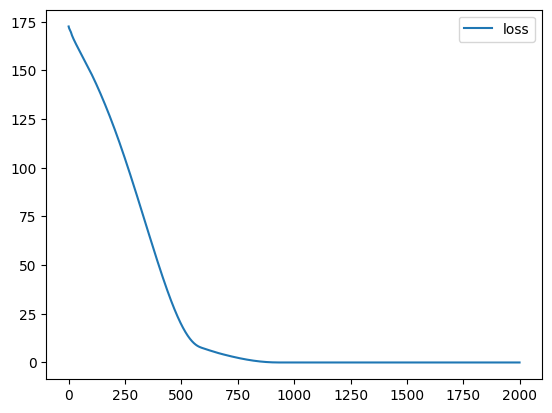

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

ai_brain.evaluate(X_test1,y_test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 0.0011


0.0011047609150409698

In [ ]:
X_n1 = [[14]]

X_n1_1= Scaler.transform(X_n1)

ai_brain.predict(X_n1_1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[15.969524]], dtype=float32)